In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

In [43]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [45]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = ['Distance_from_Home', 'Parental_Education_Level', 'Teacher_Quality']

for col in categorical_cols:
  # Convert column to string type before imputation
  df[col] = df[col].astype(str)
  df[col] = imputer.fit_transform(df[[col]]).ravel()

In [46]:
df['Hours_Studied'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6607 entries, 0 to 6606
Series name: Hours_Studied
Non-Null Count  Dtype
--------------  -----
6607 non-null   int64
dtypes: int64(1)
memory usage: 51.7 KB


In [47]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [48]:
label_map = {'Low':0, 'Medium':1, 'High':2}
df['Parental_Involvement'] = df['Parental_Involvement'].map(label_map)
df['Access_to_Resources'] = df['Access_to_Resources'].map(label_map)
df['Motivation_Level'] = df['Motivation_Level'].map(label_map)
df['Family_Income'] = df['Family_Income'].map(label_map)
df['Teacher_Quality'] = df['Teacher_Quality'].map(label_map)

In [49]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Extracurricular_Activities'] = le.fit_transform(df['Extracurricular_Activities'])
df['Internet_Access'] = le.fit_transform(df['Internet_Access'])
df['Learning_Disabilities'] = le.fit_transform(df['Learning_Disabilities'])
df['Parental_Education_Level'] = le.fit_transform(df['Parental_Education_Level'])

In [50]:
map_2 = {'Near':0, 'Moderate':1, 'Far':2}
df['Distance_from_Home'] = df['Distance_from_Home'].map(map_2)

In [51]:
map_3 = {'Public':0, 'Private':1}
df['School_Type'] = df['School_Type'].map(map_3)

In [52]:
map_4 = {'Negative':0, 'Neutral':1, 'Positive':2}
df['Peer_Influence'] = df['Peer_Influence'].map(map_4)

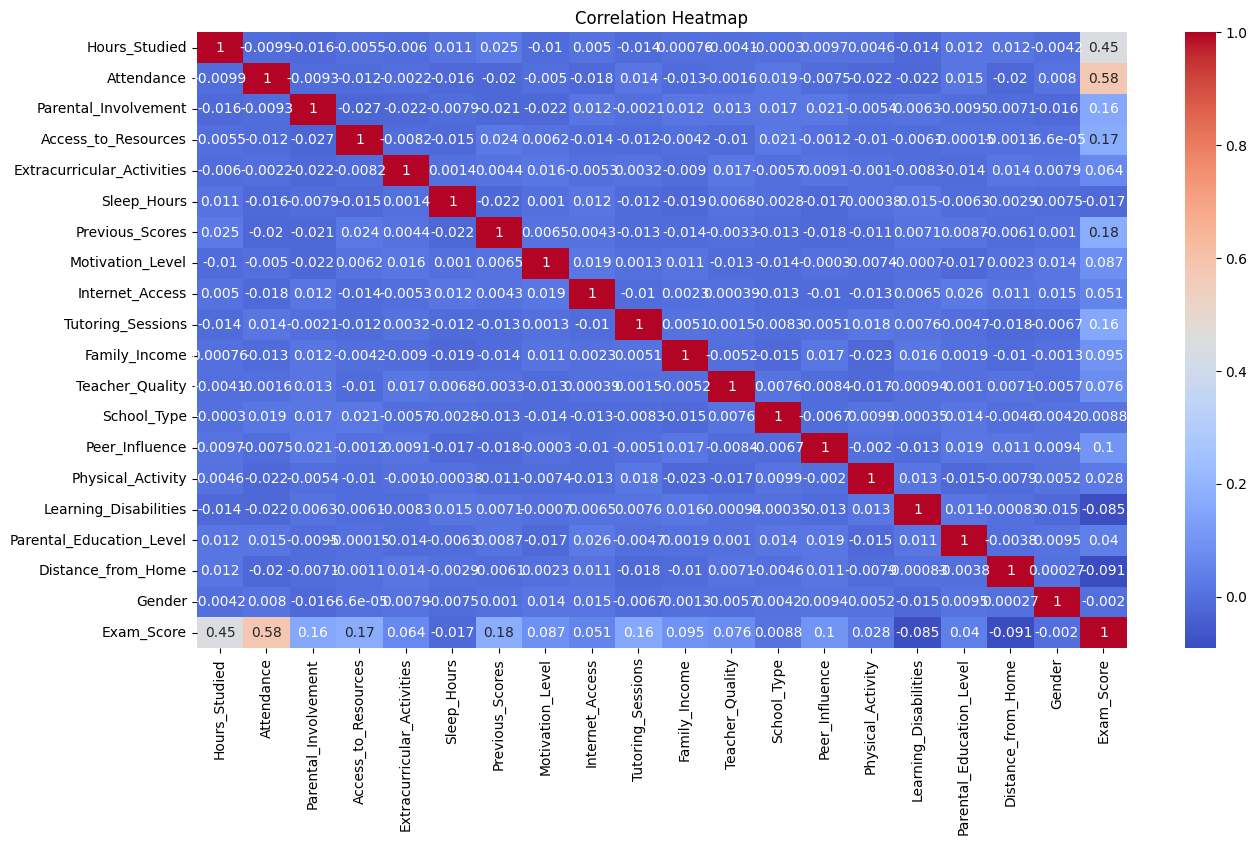

In [53]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Impute missing values for all columns
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop(['Exam_Score'],axis=1)
y = df_imputed['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_predtrain = model.predict(X_train)
y_predtest = model.predict(X_test)
r2_train = r2_score(y_train, y_predtrain)
r2_test = r2_score(y_test, y_predtest)
print("Train R2 Score:", r2_train)
print("Test R2 Score:", r2_test)

Train R2 Score: 0.7086200555081221
Test R2 Score: 0.7599880798152105


In [57]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model.fit(X_train_poly, y_train)
y_predtrain = model.predict(X_train_poly)
y_predtest = model.predict(X_test_poly)
r2_train_poly = r2_score(y_train, y_predtrain)
r2_test_poly = r2_score(y_test, y_predtest)
print("Train R2 Score:", r2_train_poly)
print("Test R2 Score:", r2_test_poly)

Train R2 Score: 0.723585259354986
Test R2 Score: 0.751983733962369


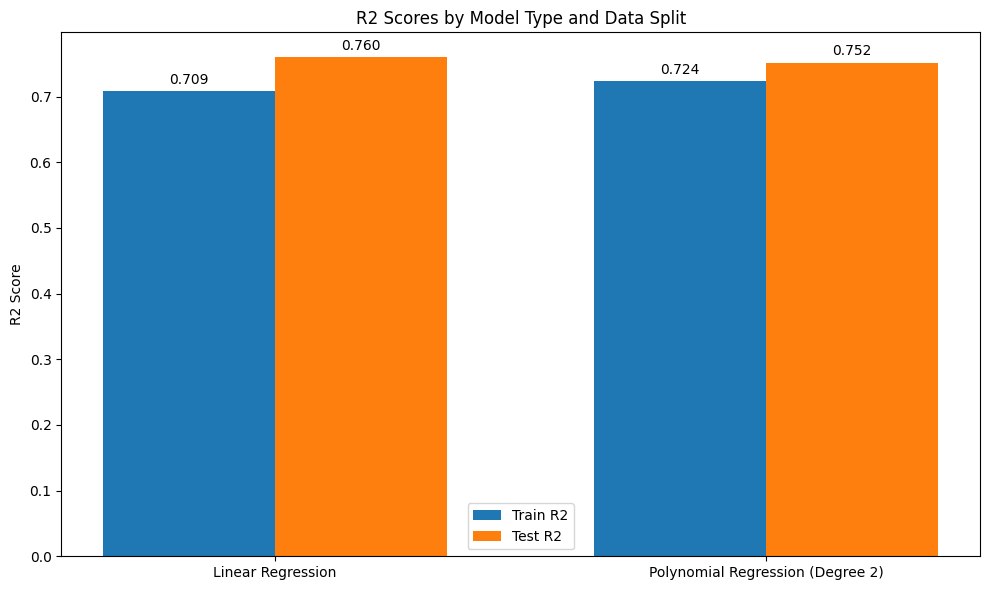

In [58]:
# R2 scores from linear regression
r2_train_linear = r2_train
r2_test_linear = r2_test

# R2 scores from polynomial regression (from cell sog4hHjsRW15)
# Note: Assuming these variables are available in the current scope after running cell sog4hHjsRW15
r2_train_poly = r2_train_poly
r2_test_poly = r2_test_poly

labels = ['Linear Regression', 'Polynomial Regression (Degree 2)']
train_scores = [r2_train_linear, r2_train_poly]
test_scores = [r2_test_linear, r2_test_poly]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train R2')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test R2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R2 Score')
ax.set_title('R2 Scores by Model Type and Data Split')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.3f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()